### Problem Set 9
#### MACS 30150, Dr. Evans
#### Due Monday, Mar. 18 at 11:30am
#### Haowen Shang

#### 1. Neural network horse race

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import uniform as sp_uniform
from scipy.stats import randint as sp_randint
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")

#### (a)

In [2]:
data = pd.read_csv('data/strongdrink.txt')
data.head()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


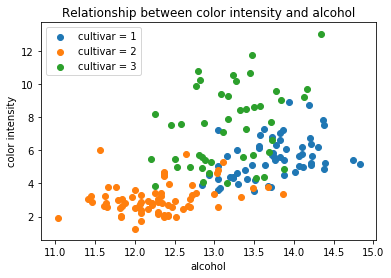

In [3]:
fig, ax = plt.subplots()

for winetype in [1,2,3]:
    points = data[data["cultivar"] == winetype]
    ax.scatter(points.alco, points.color_int, label='cultivar = ' + str(winetype))

ax.legend()
plt.xlabel("alcohol")
plt.ylabel("color intensity")
plt.title("Relationship between color intensity and alcohol")
plt.show()

#### (b)

In [4]:
X=data[["alco","malic","tot_phen","color_int"]]
y=data["cultivar"]

In [5]:
param_dist1 = {'penalty': ['l1','l2'], 'C': sp_uniform(0.1, 10.0)}

Logreg = LogisticRegression().fit(X, y)

random_search1 = RandomizedSearchCV(Logreg, 
                                    param_distributions=param_dist1,
                                    n_iter=200, n_jobs=-1, cv=5, random_state=25,
                                     scoring='neg_mean_squared_error')
RS1 = random_search1.fit(X,y)
print('Optimal tuning parameters:', RS1.best_params_)
print('MSE =', -RS1.best_score_)

Optimal tuning parameters: {'C': 2.665871587495725, 'penalty': 'l1'}
MSE = 0.11931818181818182


#### (c)

In [9]:
param_dist2 = {'n_estimators': sp_randint(10, 200),
                'max_depth': sp_randint(2, 4),
                'min_samples_split': sp_randint(2, 20),
                'min_samples_leaf': sp_randint(2, 20),
                'max_features': sp_randint(1, 4)}

random_forest = RandomForestClassifier()

random_search2 = RandomizedSearchCV(random_forest, param_distributions=param_dist2,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
RS2 = random_search2.fit(X, y)
print('Optimal tuning parameters:= ', RS2.best_params_)
print('MSE = ', -RS2.best_score_)

Optimal tuning parameters:=  {'max_depth': 3, 'max_features': 1, 'min_samples_leaf': 13, 'min_samples_split': 2, 'n_estimators': 53}
MSE =  0.13068181818181818


#### (d)

In [7]:
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
                'gamma': ['scale', 'auto'],
                'shrinking': [True, False]}

svc = SVC(kernel='rbf')

random_search3 = RandomizedSearchCV(svc, param_distributions=param_dist3,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
RS3 = random_search3.fit(X, y)
print('Optimal tuning parameters: ', RS3.best_params_)
print('MSE = ', -RS3.best_score_)

Optimal tuning parameters:  {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE =  0.14772727272727273


#### (e)

In [11]:
param_dist4 = {'hidden_layer_sizes': sp_randint(1, 100),
                'activation': ['logistic', 'relu'],
                'alpha': sp_uniform(0.1, 10.0)}

mlp = MLPClassifier(activation='tanh', solver='lbfgs', alpha=0.1)

random_search4 = RandomizedSearchCV(mlp, param_distributions=param_dist4,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
RS4 = random_search4.fit(X, y)
print('Optimal tuning parameters: ', RS4.best_params_)
print('MSE = ', -RS4.best_score_)

Optimal tuning parameters:  {'activation': 'relu', 'alpha': 1.0218890863291452, 'hidden_layer_sizes': 22}
MSE =  0.09090909090909091


#### (f)

I think multiple hidden layer neural network model is the best predictor of cultivar, since it yields the smallest mean squared error.